<a href="https://colab.research.google.com/github/amr9410/PythonDataWrangling/blob/master/Tennis_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tennis_stats.csv to tennis_stats.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['tennis_stats.csv']))
# Dataset is now stored in a Pandas Dataframe

# load and investigate the data :

In [4]:

df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


![image.png](attachment:image.png)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [6]:
df.Player.nunique

<bound method IndexOpsMixin.nunique of 0                 Pedro Sousa
1             Roman Safiullin
2                 Pedro Sousa
3         Rogerio Dutra Silva
4        Daniel Gimeno-Traver
                ...          
1716               Yann Marti
1717            Mikhail Elgin
1718    Alexander Kudryavtsev
1719             Ivan Nedelko
1720         Alexander Zverev
Name: Player, Length: 1721, dtype: object>

In [7]:
df_offensive=df[['Player','Year','Aces','DoubleFaults','FirstServe','FirstServePointsWon','SecondServePointsWon','BreakPointsFaced','BreakPointsSaved','ServiceGamesPlayed','ServiceGamesWon','TotalServicePointsWon','Wins','Losses','Winnings','Ranking']]

In [8]:
df_offensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 1721 non-null   object 
 1   Year                   1721 non-null   int64  
 2   Aces                   1721 non-null   int64  
 3   DoubleFaults           1721 non-null   int64  
 4   FirstServe             1721 non-null   float64
 5   FirstServePointsWon    1721 non-null   float64
 6   SecondServePointsWon   1721 non-null   float64
 7   BreakPointsFaced       1721 non-null   int64  
 8   BreakPointsSaved       1721 non-null   float64
 9   ServiceGamesPlayed     1721 non-null   int64  
 10  ServiceGamesWon        1721 non-null   float64
 11  TotalServicePointsWon  1721 non-null   float64
 12  Wins                   1721 non-null   int64  
 13  Losses                 1721 non-null   int64  
 14  Winnings               1721 non-null   int64  
 15  Rank

In [21]:
 df_offensive.groupby('Player').Year

In [22]:
df_offensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 1721 non-null   object 
 1   Year                   1721 non-null   int64  
 2   Aces                   1721 non-null   int64  
 3   DoubleFaults           1721 non-null   int64  
 4   FirstServe             1721 non-null   float64
 5   FirstServePointsWon    1721 non-null   float64
 6   SecondServePointsWon   1721 non-null   float64
 7   BreakPointsFaced       1721 non-null   int64  
 8   BreakPointsSaved       1721 non-null   float64
 9   ServiceGamesPlayed     1721 non-null   int64  
 10  ServiceGamesWon        1721 non-null   float64
 11  TotalServicePointsWon  1721 non-null   float64
 12  Wins                   1721 non-null   int64  
 13  Losses                 1721 non-null   int64  
 14  Winnings               1721 non-null   int64  
 15  Rank

#***EDA***

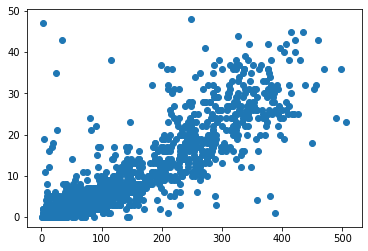

In [23]:
plt.scatter(x='BreakPointsFaced', y='Wins', data=df_offensive)

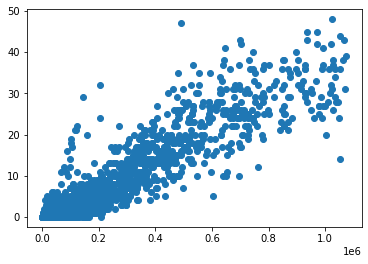

In [24]:
plt.scatter(x='Winnings', y='Wins', data=df_offensive)

# **Single Feature Linear Regression (Winnings & Wins)**

In [25]:
x=df_offensive[['Winnings']]
y=df_offensive[['Wins']]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [27]:
model = LinearRegression()

model.fit(x_train, y_train)


LinearRegression()

In [36]:
y_predict = model.predict(x_test)

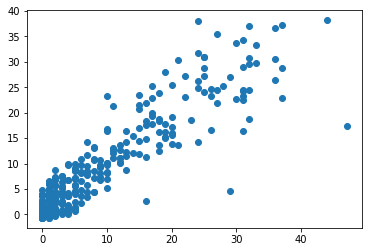

In [37]:
plt.scatter( y_test,y_predict)

#**Multible Features Linear Regression**

In [32]:
x_multible = df_offensive[['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon']]
y_multible = df_offensive[['Wins']]

In [33]:
x_train_multible, x_test_multible, y_train_multible, y_test_multible = train_test_split(x_multible, y_multible, train_size=0.8, test_size=0.2)

In [34]:
modele_multible = LinearRegression()
modele_multible.fit(x_train_multible, y_train_multible)


LinearRegression()

In [40]:
y_predict_multible = modele_multible.predict(x_test_multible)

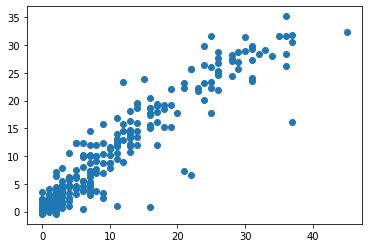

In [41]:
plt.scatter(y_test_multible, y_predict_multible)

In [35]:
modele_multible.coef_

array([[-2.76874113e-03, -8.36155588e-03,  3.31378277e+00,
         1.40998901e+01,  7.73849442e+00, -3.35654214e-02,
         6.42810870e-02, -1.66484756e+00, -2.29688747e+01]])

In [42]:
modele_multible.score(x_test_multible,  y_test_multible)

0.8985400271235762

In [43]:
modele_multible.score(x_train_multible,  y_train_multible)

0.8645336065797564

In [ ]:
print(accuracy_score(x_train_multible, ))
print(recall_score(true_labels, guesses))
print(precision_score(true_labels, guesses))
print(f1_score(true_labels, guesses))
